# ID 5059 Coursework 1
John Belcher-Heath (jbh6)

# Introduction

The task is to predict the price of a car from a subset of attributes from the Kaggle dataset.

I will complete the task following the ML checklist in the book, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. which is:

1. Frame the problem
2. Get the data
3. Explore the data
4. Prepare the data
5. Explore models
6. Fine-tune models
7. Present solution
8. Launch/maintain

# 1. Frame the problem

We want to predict the price of a car (continuos) using a small selection of attributes available to us. This makes the problem a regression problem.

Since this is a regression problem the standard performance measure of Root Mean Square Error (referred to as RMSE from now on) will be used:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n(y_i - \hat{y}_i)^2}
$$

For this measure we are looking for low RMSE. This will mean small residuals and the model is a good fit for the data.

# 2. Get the data

In this section a random slection of entries from one of the large datasets will be obtained and read into a pandas.dataframe to explore. A random selection of the large dataset will be explored since all we are doing is getting to know the data. Having a large amount of data to explore will be time consuming, but having too small (and non random sample) will mean our observations may not be valid. Taking a random sample of a large dataset should give a relatively good representation of the overall dataset, whilst minimising the amount of data requiring to be manipulated.

Note when it comes to applying the model I will include a check of the data to make sure our observations on the smaller dataset still hold.

In [1]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn | grep -v 'already satisfied'

# Import libraries
import pandas as pd
import numpy as np
import dask.dataframe as dd
import sklearn
import os
import glob
from pathlib import Path
import math

In [2]:
# folder_path: str = "/cs/studres/ID5059/Coursework/Coursework-1/data/2_medium" # uni
folder_path : str = r"/home/johnbh/personal_git/ID5059_coursework_1/data/3_large" # Desktop

if not os.path.exists(folder_path):
    raise FileNotFoundError
os.chdir(folder_path)

file_names : list = [i for i in glob.glob("*.{}".format('csv'))]

    
def read_car_data(filepath : str) -> pd.DataFrame:
    """
    Reads a filepath and returns the dataframe
    :param filepath: The location of the file to read
    :return: returns the pandas dataframe
    """
    return pd.read_csv(filepath)#, index_col = "vin")

original_df: pd.DataFrame = read_car_data(file_names[0])

# Clear the maximum number of columns to be displayed, so that all will be visible.
pd.set_option('display.max_columns', None)
# check data looks roughly okay
original_df.head(5)

/tmp/ipykernel_27558/1870162095.py:17: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath)#, index_col = "vin")


,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


# 3. Explore the data

The data will now be inspected to explore what attributes are available to using the info output. Attributes with large proportion of NAs can start to be identified as well.

In [3]:
# original_df: pd.DataFrame = original_df.reset_index(drop=True) # Reindex to make elements easier to quickly access
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295502 entries, 0 to 295501
Data columns (total 66 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   vin                      295502 non-null  object 
 1   back_legroom             281082 non-null  object 
 2   bed                      1850 non-null    object 
 3   bed_height               33799 non-null   object 
 4   bed_length               33799 non-null   object 
 5   body_type                294317 non-null  object 
 6   cabin                    5630 non-null    object 
 7   city                     295502 non-null  object 
 8   city_fuel_economy        246749 non-null  float64
 9   combine_fuel_economy     0 non-null       float64
 10  daysonmarket             295502 non-null  int64  
 11  dealer_zip               295502 non-null  object 
 12  description              285686 non-null  object 
 13  engine_cylinders         286555 non-null  object 
 14  engi

In [4]:
# Explore attributes
original_df.head(5)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


Initial observations from head:

- A lot of measurements contain the units, making the non-numerical
- Descriptions contain lots of irrelevant information
- A few columns seem to represent the same information
- Some attributes appear to have lots of NaNs
- Multiple ID attributes which can all be dropped
- `major_options` is a list which will need parsing somehow
- `power` contains all the info of `horsepower`
- Lots of irrelevant metadata to drop

Let's split the data

In [5]:
from sklearn.model_selection import train_test_split

split_train: float = 0.6# fraction of data to use to explore

train_set, test_set = train_test_split(original_df, test_size = split_train, random_state=314)

df = train_set.copy() # copy so can recover if needs
sample_size: int = len(train_set)

### Start to inspect
Firstly, let's drop all attributes from above which have less than 50% non-null values, since including these may negatively effect our model if a majority of entries do not have this attribute. Using them in our model will mean the model is not very general.

In [6]:
# Drop all attributes with less than 50% non-null values
df = df.drop(columns=df.keys()[df.count() / sample_size < 0.5])

### Data types correction
Some of the attributes appear to have been imported with different datatype, for example `zip code` as `object` not `int64`. This will be due to some integer attributes containing `NaNs`, and since the system has no interpretation for `NaNs` in `integer` types, they are taken as `object` data types instead. 

To further inspect this, all `object` data types are shown below.

In [7]:
df.select_dtypes(include=object).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118200 entries, 82718 to 14856
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   vin                   118200 non-null  object
 1   back_legroom          112373 non-null  object
 2   body_type             117722 non-null  object
 3   city                  118200 non-null  object
 4   dealer_zip            118200 non-null  object
 5   description           114154 non-null  object
 6   engine_cylinders      114639 non-null  object
 7   engine_type           114639 non-null  object
 8   exterior_color        118200 non-null  object
 9   fleet                 65205 non-null   object
 10  frame_damaged         65205 non-null   object
 11  franchise_make        93304 non-null   object
 12  front_legroom         112373 non-null  object
 13  fuel_tank_volume      112373 non-null  object
 14  fuel_type             115313 non-null  object
 15  has_accidents 

From manual inspection there are some attributes that need further inspection to check they have been given the correct type. The first 5 entries are shown below to help.

In [8]:
pd.set_option('display.max_columns', None)
df.select_dtypes(include=object).head(5)

,vin,back_legroom,body_type,city,dealer_zip,description,engine_cylinders,engine_type,exterior_color,fleet,frame_damaged,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,interior_color,isCab,length,listed_date,listing_color,main_picture_url,major_options,make_name,maximum_seating,model_name,power,salvage,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width
82718,1FDTF4HT9LED12516,NaN,Pickup Truck,Berlin,6037,"Family Owned and Operated for 4 Generations. ""...",V8 Biodiesel,V8 Biodiesel,Oxford White,NaN,NaN,Ford,NaN,NaN,Biodiesel,NaN,NaN,Medium Earth Gray w/Cloth 40/20/40 Split Bench...,NaN,NaN,2020-08-07,WHITE,NaN,"['Bluetooth', 'Dual Rear Wheels', 'Remote Start']",Ford,NaN,F-450 Super Duty,NaN,NaN,Tasca Ford Berlin,NaN,NaN,A,Automatic,NaN,NaN,NaN,NaN,NaN,NaN
63383,3GNCJKSB9LL323515,35.7 in,SUV / Crossover,New Hudson,48165,"$5,592 off MSRP! Priced below KBB Fair Purchas...",I4,I4,Satin Steel Metallic,NaN,NaN,Chevrolet,40.8 in,14 gal,Gasoline,NaN,64.9 in,Black,NaN,167.6 in,2020-08-15,UNKNOWN,https://static.cargurus.com/images/forsale/202...,"['SE Package', 'Alloy Wheels', 'Backup Camera'...",Chevrolet,5 seats,Trax,"138 hp @ 4,900 RPM",NaN,Feldman Chevrolet of New Hudson,NaN,148 lb-ft @ 200 RPM,A,6-Speed Automatic,t85771,LS FWD,FWD,Front-Wheel Drive,100.6 in,69.9 in
292732,4S4BTACC3L3251329,39.5 in,SUV / Crossover,Trenton,4605,Check out this 2020! A great vehicle and a gre...,H4,H4,Tungsten,NaN,NaN,Subaru,42.8 in,18.5 gal,Gasoline,NaN,66.1 in,White (Ivory),NaN,191.3 in,2020-08-25,UNKNOWN,https://static.cargurus.com/images/forsale/202...,NaN,Subaru,5 seats,Outback,"182 hp @ 5,800 RPM",NaN,Stanley Subaru,NaN,"176 lb-ft @ 4,400 RPM",CVT,Continuously Variable Transmission,t89995,Premium AWD,AWD,All-Wheel Drive,108.1 in,82 in
286279,1FTFW1ET6DFB56497,43.5 in,Pickup Truck,Turner,4282,[!@@Additional Info@@!]Bluetooth|Chrome Wheels...,V6,V6,Blue Flame Metallic,False,False,NaN,41.4 in,36 gal,Gasoline,False,76.7 in,Steel Gray,False,231.9 in,2020-07-10,BLUE,https://static.cargurus.com/images/forsale/202...,"['Chrome Wheels', 'Bluetooth', 'Tow Package']",Ford,6 seats,F-150,"411 hp @ 5,500 RPM",False,K.R.Y. Auto Sales,False,"434 lb-ft @ 4,500 RPM",A,Automatic,t46446,XLT SuperCrew 4WD,4WD,Four-Wheel Drive,144.5 in,97 in
92316,2T2BZMCA0HC093769,NaN,SUV / Crossover,Holyoke,1040,"At Gary Rome, we service all makes and models ...",V6,V6,Autumn Shimmer,False,False,Hyundai,NaN,NaN,Gasoline,False,NaN,None,False,NaN,2020-08-22,UNKNOWN,https://static.cargurus.com/images/forsale/202...,"['Adaptive Cruise Control', 'Alloy Wheels', 'B...",Lexus,NaN,RX 350,NaN,False,Gary Rome Hyundai,False,NaN,A,8-Speed Automatic,NaN,NaN,NaN,NaN,NaN,NaN


The only attribute that can be directly converted to an integer is the `dealer_zip`, this is unlikely to provide any additional information that the `lattitude` and `longitutde` will not already give so no need to convert.This is dropped from our dataset below. 

This inspection has shown that a lot of the measurements have had units included, so these attributes will need to be converted to numerical.

In [9]:
# Drop dealer_zip
try:
    df = df.drop(columns='dealer_zip')
except KeyError:
    print("Column already dropped")

In [10]:
def convert_measurement(s: str) -> float:
    """
    Converts the measuremnt with units to a numerical value
    :param s: string measurement
    :type s: str
    :return: the actual numerical value
    """
    if type(s) == str:
        s_split: list = s.split(" ")
        try:
            return float(s_split[0])
        # If cannot convert to dtype, ie NA then return NA
        except ValueError:
            return float('NaN')
    # If already converted to correct format, ie if function accidently run twice
    else:
        return s

cols_to_convert: list = ["back_legroom", "front_legroom", "fuel_tank_volume", "height", "length", 
                         "maximum_seating", "wheelbase", "width"]

In [11]:
# Apply the function to get numerical data from the string measurements
df[cols_to_convert] = df[cols_to_convert].applymap(convert_measurement)
df[cols_to_convert] = df[cols_to_convert].astype(np.float64)

It is important to note that the attributes `power` and `torque` contain numerical data, but they cannot be simply convert at this point but will be saved for later.

Next, let's drop all the irrelevant meta data which won't be helpful with our model and will instead just increase the complexity which could lead to overfitting. For example the `description`, `interior color`, `exterior color`, `vin` etc.

In [12]:
df = df.drop(columns=['description', 'interior_color', 'exterior_color', 
                      'main_picture_url', 'model_name', 'sp_name', 'transmission_display',
                      'trim_name', 'trimId', 'vin', 'sp_id', 'listing_id'])

### Fixing duplicates part 1

It is easy to see that `engine_cylinders` and `engine_type` appear to be duplicate. Similarly so do `wheel_system` and `wheel_system_display`, as well as `make_name` and `franchise_make`.

Before dropping one of each of these, the data will be further inspected to make sure that there's no discrepancy between the two in the wider data set (i.e. not just in the head).

In [13]:
df_engine = df[['engine_cylinders', 'engine_type']]
df_engine[np.logical_xor(df_engine.engine_cylinders.isna(), df_engine.engine_type.isna())].count()

engine_cylinders    0
engine_type         0
dtype: int64

So above tells us that all entries with attributes are identical in being either NA or not, so dropping one of these attributes means no information is lost.

In [14]:
df = df.drop(columns='engine_cylinders')

For the `wheel_system` and `wheel_system_display`:

In [15]:
df_wheel = df[['wheel_system', 'wheel_system_display']]
df_wheel[np.logical_xor(df_wheel.wheel_system.isna(), df_wheel.wheel_system_display.isna())].count()

wheel_system            0
wheel_system_display    0
dtype: int64

The above implies that both attributes provide the same information for the cars. Hence deciding which to drop is irrelevant. I will choose to drop the `wheel_system_display` since wheel system has a nice short appriviation.

In [16]:
df = df.drop(columns='wheel_system_display')

Finally for make.

In [17]:
df_make = df[['make_name', 'franchise_make']]
df_make[np.logical_xor(df_make.make_name.isna(), df_make.franchise_make.isna())].count()

make_name         24896
franchise_make        0
dtype: int64

From this we can see that the `make_name` has more information than the `franchise_make`, hence the `franchise_make` is dropped.

In [18]:
df = df.drop(columns='franchise_make')

### Fixing duplicates part 2

For part 2, these duplicates data may need to be extracted then compared, before just dropping attributes.

Let's inspect the engine data:

In [19]:
df[np.logical_xor(df.engine_displacement.isna(), df.horsepower.isna())]

,back_legroom,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,isCab,is_new,latitude,length,listed_date,listing_color,longitude,major_options,make_name,maximum_seating,mileage,owner_count,power,price,salvage,savings_amount,seller_rating,theft_title,torque,transmission,wheel_system,wheelbase,width,year


So, luckily `horsepower` and `power` do give the same information so one can be dropped arbitrarily. As horsepower is already numerical, `power` will be dropped.

In [20]:
df = df.drop('power', axis=1)

There is also another useful attribute of RPM which could help to distinguish between performance cars with large horsepower and 4x4 with the same, but there may be too many NAs for this attribute to use this metric, let's see.

In [21]:
df.horsepower.count() / sample_size

0.9474619289340102

So from above we can see that only around 5% have no `horsepower` attribute. For these remaining entries we will consider how many have engine size attributes.

In [22]:
len(df[(df['horsepower'].isna() & df['engine_type'].isna())]) / sample_size

0.02148900169204738

Now there is only a small amount of cars with neither `horsepower`, `power` or `engine_type` attribute. All these entries will simply take the overall average for `horsepower`.

The `horsepower` for all cars will be assigned using the following:

- if the car has `horspower` asigned pass
- elif the car has `engine_type` assign average for that type
- else assign the overall average for `horsepower`

Let's do the first to steps:

In [23]:
df[['horsepower']] = df[['horsepower', 'engine_type']].groupby('engine_type').transform(lambda x: x.fillna(x.mean()))

Let's examine the improvements

In [24]:
df.horsepower.count() / sample_size

0.9698730964467005

Now for the final step of assigning the last na just the average of all the horsepowers:

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['horsepower']])

df[['horsepower']] = imputer.transform(df[['horsepower']])

Let's see the results

(1.0, <Axes: >)

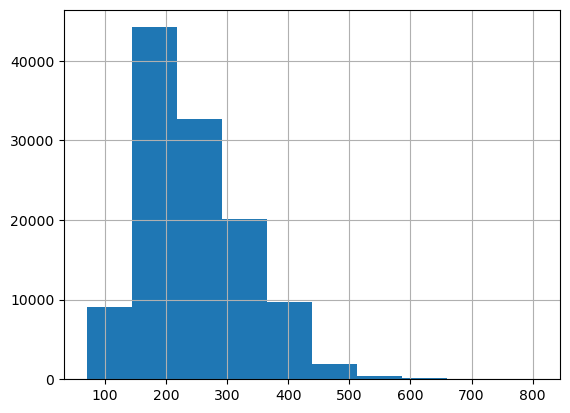

In [26]:
df.horsepower.count() / sample_size, df.horsepower.hist()

Everything looks all good!

In [27]:
#######################################

In [28]:
def get_power_data(s: str):
    """
    Returns the hp and RPM from the power string
    attribute of a vehicle
    """
    if not pd.isna(s):
        try:
            string_split: list = s.split(" ")
            return string_split[0], string_split[3].replace(",", "")
        except AttributeError:
            pass
    return np.nan, np.nan

# Example of usage
#zip(*map(get_power_data, df.engine_size))

In [29]:
######################################

### Object type attributes
Now we have removed some of the duplicates and corrected some of the data type issues the `object` type attributes will be properly explored now.

In [30]:
df.select_dtypes(include=object).head(5)

,body_type,city,engine_type,fleet,frame_damaged,fuel_type,has_accidents,isCab,listed_date,listing_color,major_options,make_name,salvage,theft_title,torque,transmission,wheel_system
82718,Pickup Truck,Berlin,V8 Biodiesel,NaN,NaN,Biodiesel,NaN,NaN,2020-08-07,WHITE,"['Bluetooth', 'Dual Rear Wheels', 'Remote Start']",Ford,NaN,NaN,NaN,A,NaN
63383,SUV / Crossover,New Hudson,I4,NaN,NaN,Gasoline,NaN,NaN,2020-08-15,UNKNOWN,"['SE Package', 'Alloy Wheels', 'Backup Camera'...",Chevrolet,NaN,NaN,148 lb-ft @ 200 RPM,A,FWD
292732,SUV / Crossover,Trenton,H4,NaN,NaN,Gasoline,NaN,NaN,2020-08-25,UNKNOWN,NaN,Subaru,NaN,NaN,"176 lb-ft @ 4,400 RPM",CVT,AWD
286279,Pickup Truck,Turner,V6,False,False,Gasoline,False,False,2020-07-10,BLUE,"['Chrome Wheels', 'Bluetooth', 'Tow Package']",Ford,False,False,"434 lb-ft @ 4,500 RPM",A,4WD
92316,SUV / Crossover,Holyoke,V6,False,False,Gasoline,False,False,2020-08-22,UNKNOWN,"['Adaptive Cruise Control', 'Alloy Wheels', 'B...",Lexus,False,False,NaN,A,NaN


First let's see if any of the attributes have any blaring issues with NAs.

In [31]:
df.select_dtypes(include=object).count() / sample_size

body_type        0.995956
city             1.000000
engine_type      0.969873
fleet            0.551650
frame_damaged    0.551650
fuel_type        0.975575
has_accidents    0.551650
isCab            0.551650
listed_date      1.000000
listing_color    1.000000
major_options    0.923545
make_name        1.000000
salvage          0.551650
theft_title      0.551650
torque           0.839797
transmission     0.986074
wheel_system     0.955008
dtype: float64

Clerly some of the attributes are not suitable to use since they have a low number of entries. Any object attributes with less than 80% entries are removed.

In [32]:
df = df.drop(columns=df.select_dtypes(include=object).loc[:, df.select_dtypes(include=object).count() / sample_size < 0.8].keys())

This leaves:

In [33]:
df.select_dtypes(include=object).head(5)

,body_type,city,engine_type,fuel_type,listed_date,listing_color,major_options,make_name,torque,transmission,wheel_system
82718,Pickup Truck,Berlin,V8 Biodiesel,Biodiesel,2020-08-07,WHITE,"['Bluetooth', 'Dual Rear Wheels', 'Remote Start']",Ford,NaN,A,NaN
63383,SUV / Crossover,New Hudson,I4,Gasoline,2020-08-15,UNKNOWN,"['SE Package', 'Alloy Wheels', 'Backup Camera'...",Chevrolet,148 lb-ft @ 200 RPM,A,FWD
292732,SUV / Crossover,Trenton,H4,Gasoline,2020-08-25,UNKNOWN,NaN,Subaru,"176 lb-ft @ 4,400 RPM",CVT,AWD
286279,Pickup Truck,Turner,V6,Gasoline,2020-07-10,BLUE,"['Chrome Wheels', 'Bluetooth', 'Tow Package']",Ford,"434 lb-ft @ 4,500 RPM",A,4WD
92316,SUV / Crossover,Holyoke,V6,Gasoline,2020-08-22,UNKNOWN,"['Adaptive Cruise Control', 'Alloy Wheels', 'B...",Lexus,NaN,A,NaN


Since we have `daysonmarket` attribute the `listed_date` can be dropped. Additionally, `city` can assumed to have minimal effect since most cities can be assumed to have a diverse range of individuals with varying wealth and cars.

In [34]:
df = df.drop(columns=['city', 'listed_date'])

`torque` could be useful but there is too few entries (see below) for it and it is not recorded elsewhere (like `horsepower` recorded in `power` and `engine_size`). Hence I will not use this attribute for my model

In [35]:
df.torque.count() / sample_size

0.8397969543147208

In [36]:
df = df.drop(columns='torque')

For major options, since there is so much variabilty from visual inspection of naming of products, the number of major of features will be used instead. The actual usefulness of this will be explored later.

In [37]:
df.major_options = df.major_options.apply(lambda x: len(x.split(",")) if type(x) == str else "NaN").astype(np.float64)

For the remaining attributes, these will be used as categorical attributes in the model.

In [38]:
chosen_categorical_attributes : list = df.select_dtypes(include=object).keys().to_list()

### Explore the bool values
Next let's explore the boolean attributes available

In [39]:
df.select_dtypes(include=bool).head(5)

,franchise_dealer,is_new
82718,True,True
63383,True,True
292732,True,True
286279,False,False
92316,True,False


Both these could be useful, let's see if there's any issues with NaNs

In [40]:
df.select_dtypes(include=bool).count() / sample_size

franchise_dealer    1.0
is_new              1.0
dtype: float64

Fantastic! Both these attriubtes have no NaNs so can be used straight away.

In [41]:
chosen_boolean_attributes : list = ['franchise_dealer', 'is_new']

### Exploring the numerical attributes

Now the qualitative attributes have been dealt with it's time for the quantiative attributes.

Let's explore all the numerical attributes with an actual numerical meaning(index or listing_id have no meaning numerically). Attributes with no numerical meaning our dropped below.

In [42]:
# Quick inspection to see which numerical but non-relevant attributes need to be dropped
df.select_dtypes(include=[np.int64, np.float64])

,back_legroom,city_fuel_economy,daysonmarket,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,latitude,length,longitude,major_options,maximum_seating,mileage,owner_count,price,savings_amount,seller_rating,wheelbase,width,year
82718,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,448.661826,41.6311,NaN,-72.7434,3.0,NaN,5.0,NaN,61465.0,0,4.100000,NaN,NaN,2020
63383,35.7,26.0,25,1400.0,40.8,14.0,64.9,31.0,138.000000,42.5157,167.6,-83.6101,5.0,5.0,3.0,NaN,17463.0,0,4.095238,100.6,69.9,2020
292732,39.5,26.0,15,2500.0,42.8,18.5,66.1,33.0,182.000000,44.5090,191.3,-68.3894,NaN,5.0,1.0,NaN,30259.0,0,4.888889,108.1,82.0,2020
286279,43.5,15.0,61,3500.0,41.4,36.0,76.7,21.0,365.000000,44.2706,231.9,-70.2498,3.0,6.0,138584.0,2.0,15990.0,2456,4.000000,144.5,97.0,2013
92316,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,300.829801,42.1821,NaN,-72.6381,4.0,NaN,53551.0,1.0,32987.0,799,4.444444,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,37.4,51.0,10,1600.0,41.7,11.9,60.8,46.0,139.000000,40.7589,171.5,-73.1055,4.0,5.0,2.0,NaN,24345.0,0,3.647059,106.3,71.1,2020
142166,38.1,30.0,129,2000.0,41.2,14.5,57.2,42.0,140.000000,42.5115,182.2,-90.7427,3.0,5.0,46143.0,2.0,12500.0,918,3.833333,104.4,70.0,2014
175817,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,183.830967,42.7124,NaN,-71.1996,1.0,NaN,108662.0,1.0,14900.0,1215,4.000000,NaN,NaN,2017
75373,36.1,22.0,19,2000.0,42.8,15.9,64.8,28.0,235.000000,42.5553,182.3,-70.9637,9.0,5.0,16352.0,1.0,30988.0,1439,4.636364,104.7,83.9,2017


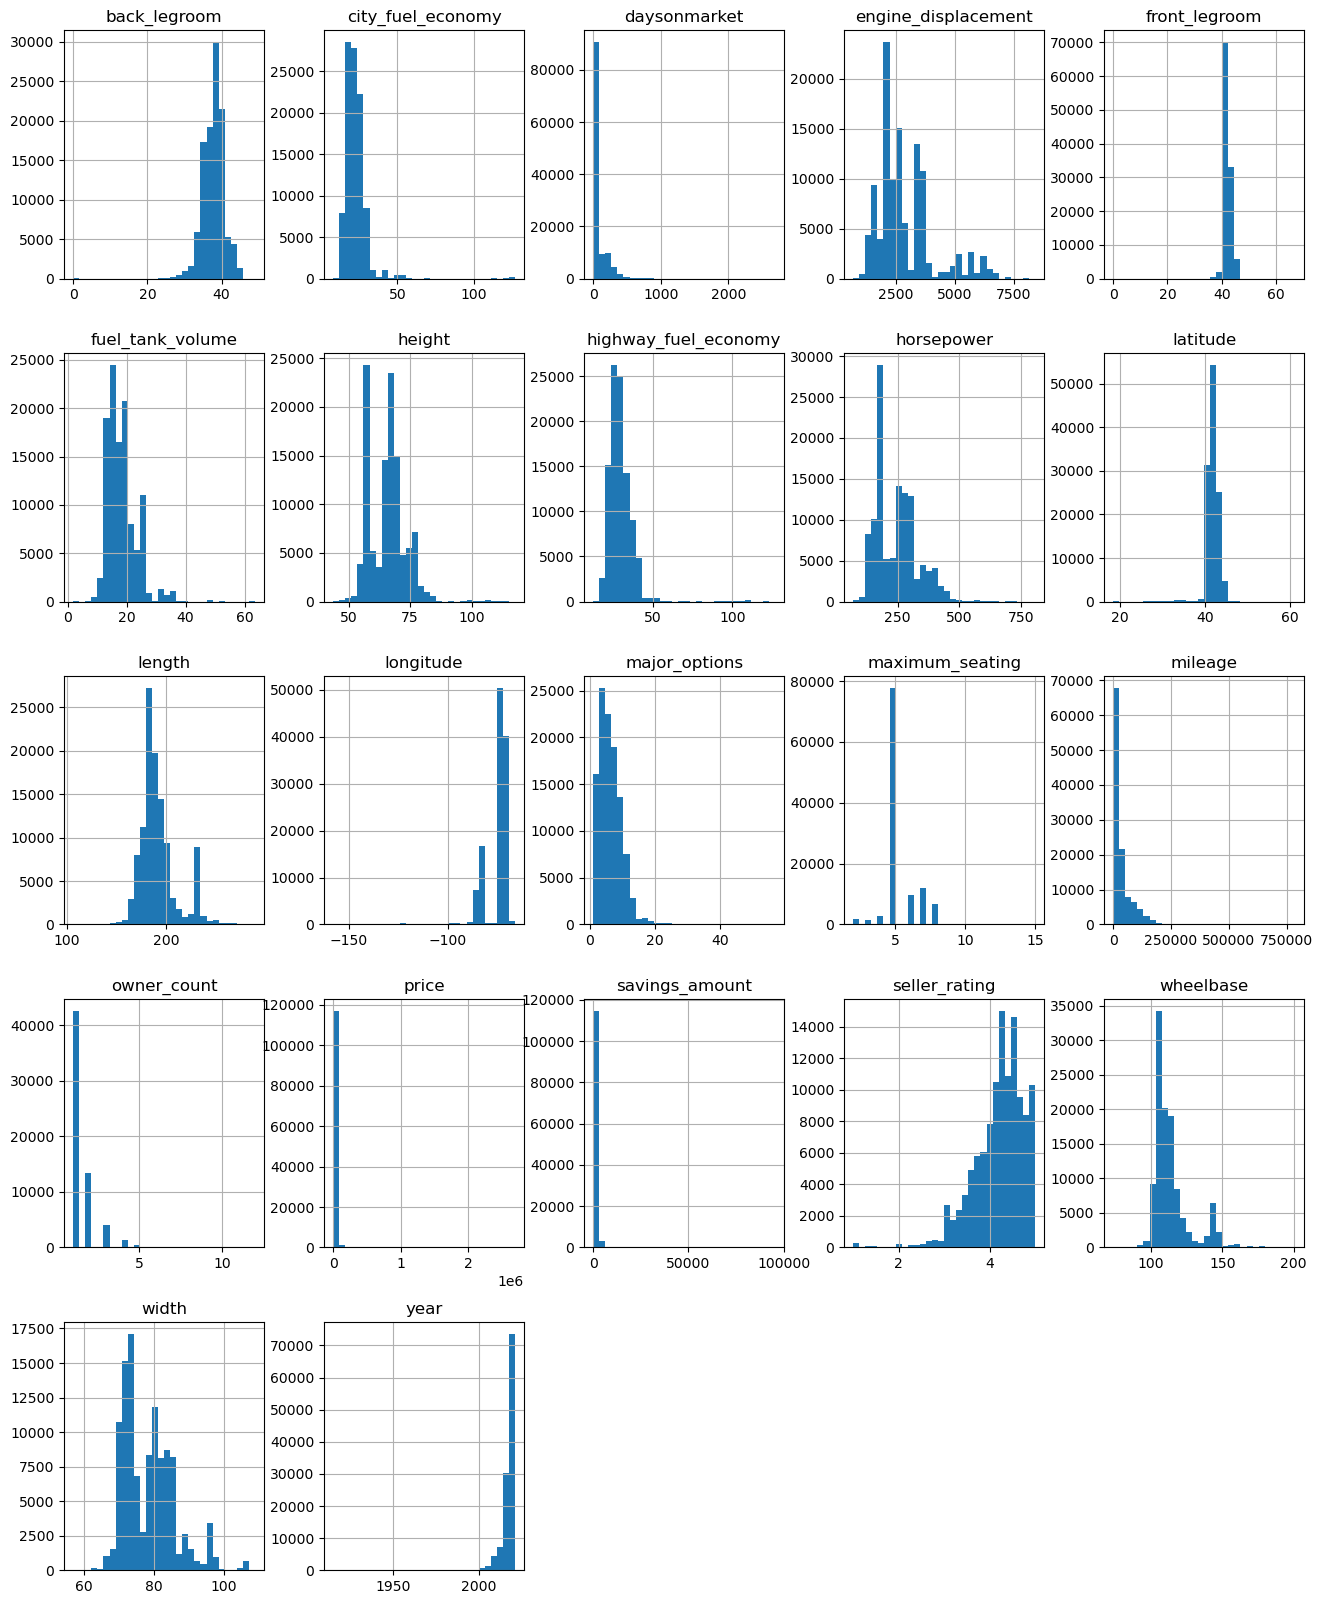

In [43]:
import matplotlib.pyplot as mpl
%matplotlib inline

df_numerical = df.select_dtypes(include=[np.int64, np.float64])
df_numerical.hist(figsize=(16,20), bins=30)
mpl.show()

Observations:
- Both Fuel economy attributes appear to be normally distributed with a slight skew
- Majority of cars do not stay on the market for a long duration, mostly less than a couple of months. Some may be above a large amount so these may need to be removed to not skew data.
- Engine displacement doesn't appear to have any obvious standard distribution
- Horsepower appears to have a normal distribution around 200hp with a standard deviation of around 50hp
- Lattitude is as expected all grouped together around 39 to 44 
- longitutde is split into two peaks, most likely corresponding to central US and alaska
- Milegae of most cars is grouped mostly around 0 and fewer cars with higher mileage, as would be expected
- owner count has a modal of 1, again as to be expected
- Most cars prices are group around the same order of magnitutde. Howeever some extremes are seen. A logarithmic transformation may need to be considered later.
- Seller ratings appear to be skew negatively towards the higher end
- Majority of cars are from the last 15 years
- Modal max seats is 5

It is clear as well that some of the bins are very sparse so will need coarser bins with labels for our model later to make sure our training set and test set have similar distributions.

In [44]:
df.select_dtypes(include=[np.float64, np.int64]).count() / sample_size

back_legroom            0.916557
city_fuel_economy       0.835685
daysonmarket            1.000000
engine_displacement     0.947462
front_legroom           0.944484
fuel_tank_volume        0.950135
height                  0.950558
highway_fuel_economy    0.835685
horsepower              1.000000
latitude                1.000000
length                  0.950558
longitude               1.000000
major_options           0.923545
maximum_seating         0.950533
mileage                 0.959382
owner_count             0.523003
price                   1.000000
savings_amount          1.000000
seller_rating           0.986557
wheelbase               0.950558
width                   0.950550
year                    1.000000
dtype: float64

Firstly it is clear to see there is no issue with NAs in the attributes: `daysonmarket`, `lattitude`, `longitude`, `price`, `savings_amount` and `year` (as well as `horsepower` after the fix above). Using contextual knowledge all these attributes (excl `price` as this is being compared to) will likely be useful in predicting the `price` attribute so will be used. 

Looking at the list of other attributes available with a low number of non-nulls. The additional attributes I believe may effect the `price` and want to explore more are:

- `city_fuel_economy` and `highway_fuel_economy` - useful metric of car performance, more powerful and expensive cars likely to have lower fuel efficiency
- `fuel_tank_volume` - bigger more expensive cars likely to have a large fuel tank, hence useful metric
- `engine_displacement` and `horsepower` (and `power` which will be used to get na values) - all similar/the same metrics for how powerful a car is
- `major_options` - more expensive cars tend to have more options
- `mileage` - more miles done the less it is valued generally
- `seller_rating` - If a seller has a better rating people may pay more than if they were to go to a seller with a poor rating.
- `length` and `width` - A measure of the size of the car. Large cars tend to be more expensive. E.g. sports cars are very wide generally.

I have chosen not to include `owner_count` since there are too few entries for this attribute. Additonally `maximum_seating` is also excluded, although small number of non-nulls, this is since cars seating will have little effect on price. Think two seat sports cars and a smart car, or a 5 seat corsa and a 5 seat golf.

To explore these options there is some transformation required to remove any skew by the extreme values, also to reduce the complexity of the model.

### Attribute transformation
From the graphs above some attributes we have chosen to explore further need transforming so that the distribution of the training set and test set are similar. To do this the function below will be used.

**The function will be demonstrated but not applied to the data yet since there are NAs that need filling**

In [45]:
### NEED TO TWEAK
def transform_bins(pds: pd.Series, bins, min_val = None, max_val = None) -> pd.Series:
    """
    Function to transform a continuous series with sparse data to a categorical attribute with full bins.
    The absolute max is always 0 and inf to make sure all data is captured.
    :param pds: original cts data
    :param bins: number of bins in resultant series (note this is how many will be attempted to be created)
    :min_val: starting value for main section of the bins
    :max_val: ending value for main section of the bins
    :return: transformed series
    """
    bins -=1
    if min_val is not None and max_val is not None: 
        cuts: list = np.append(np.linspace(min_val, max_val, bins), np.array([np.inf])).tolist()
        cuts.insert(0,0)
    else:
        cuts: list = np.append(np.linspace(pds.quantile(0.025), pds.quantile(0.975), bins), np.array([np.inf])).tolist()
        cuts.insert(0, 0)
        
    # Drop any duplicates, ie if 0 included twice
    cuts = list(dict.fromkeys(cuts))
    labels: list = [str(i) for i in range(len(cuts)-1)]
    # include_lowest needed to make sure if values are 0 they're still given a label
    return pd.cut(pds, bins=cuts, labels=labels, include_lowest=True).astype(np.float64)

The attributes needing to be transformed are:

In [46]:
transform_attributes: list = ["city_fuel_economy", "highway_fuel_economy","daysonmarket", "fuel_tank_volume", 
                              "mileage", "savings_amount", "year"]

The function will be applied in a uniform way with 30 bins for each first, these will then be inspected to see if more detailed transformation may be required

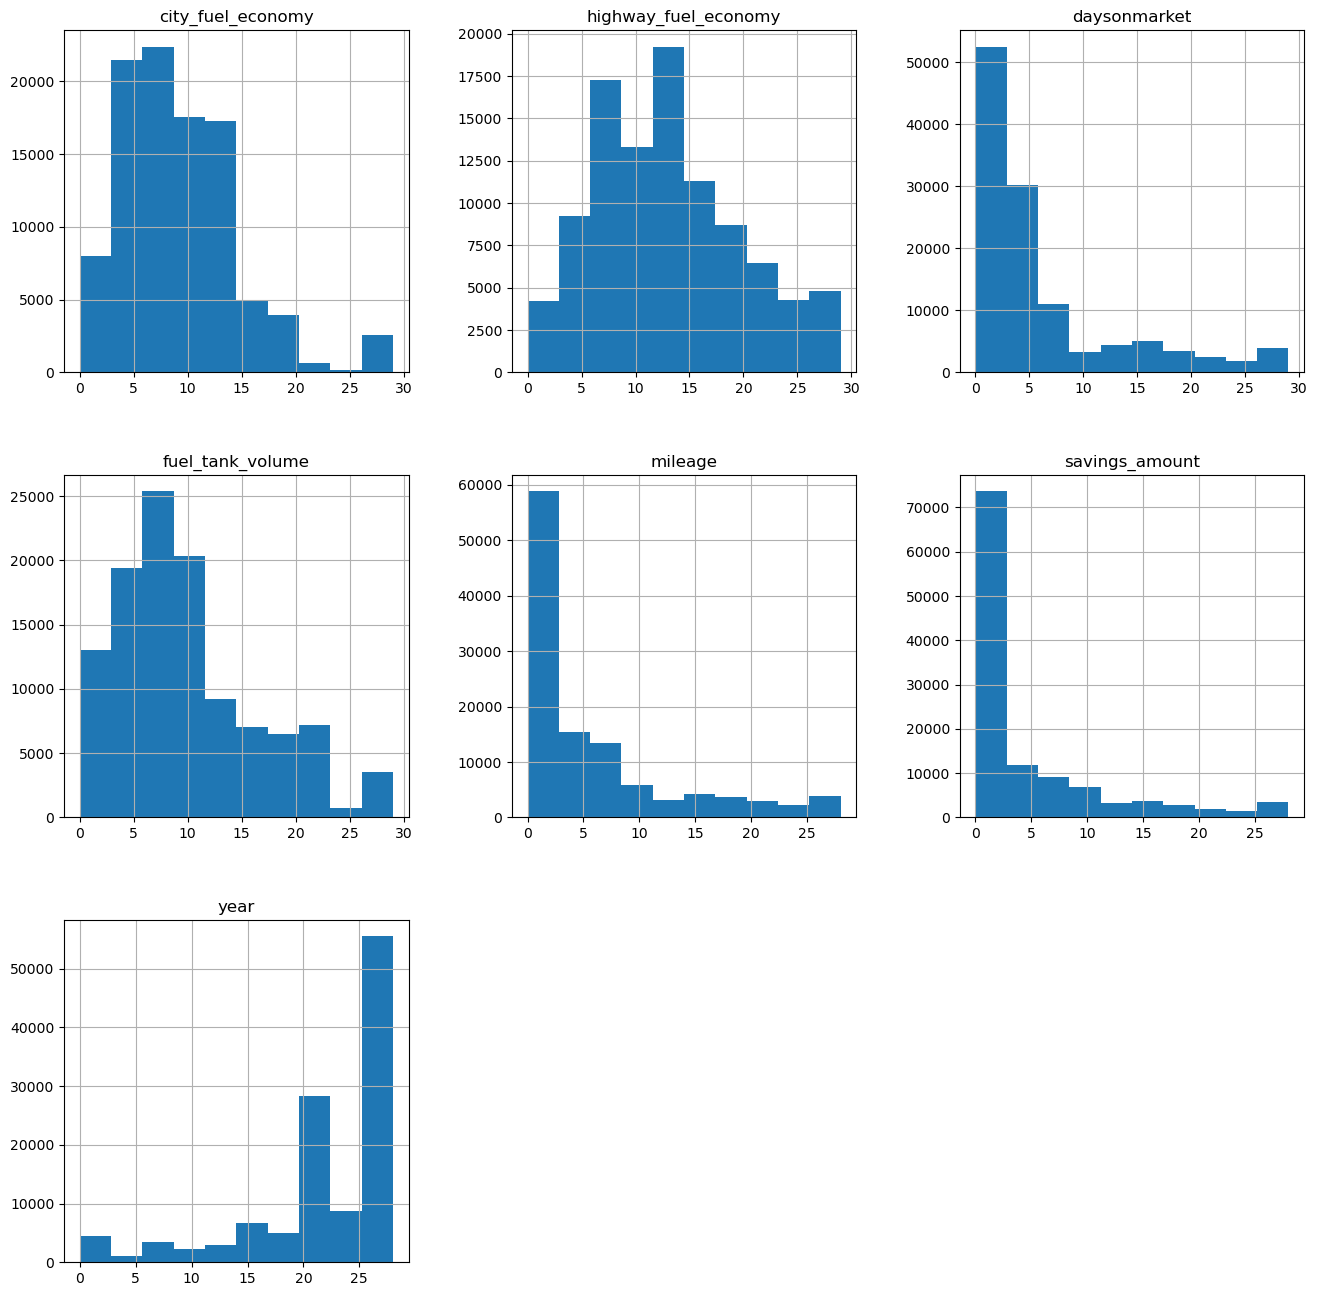

In [47]:
transformed_attr: pd.DataFrame = df[transform_attributes].apply(lambda x: transform_bins(x, bins=30))
transformed_attr.hist(figsize=(16,16))
mpl.show()

In [48]:
transformed_attr.count() / sample_size

city_fuel_economy       0.835685
highway_fuel_economy    0.835685
daysonmarket            1.000000
fuel_tank_volume        0.950135
mileage                 0.959382
savings_amount          1.000000
year                    1.000000
dtype: float64

These distributions look much better than before. However there may be a slight issue with `savings_amount` and `city_fuel_economy`. For this one different min, max and bins need to be used. Using contextual knowledge the following conversions are used.

In [49]:
transformed_attr[['city_fuel_economy']] = df[['city_fuel_economy']].apply(lambda x: transform_bins(x, bins=5, min_val=18, max_val=28))

In [50]:
transformed_attr[['savings_amount']] = df[['savings_amount']].apply(lambda x: transform_bins(x, bins=5, min_val=100, max_val=3000))

array([[<Axes: title={'center': 'city_fuel_economy'}>,
        <Axes: title={'center': 'highway_fuel_economy'}>,
        <Axes: title={'center': 'daysonmarket'}>],
       [<Axes: title={'center': 'fuel_tank_volume'}>,
        <Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'savings_amount'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >, <Axes: >]],
      dtype=object)

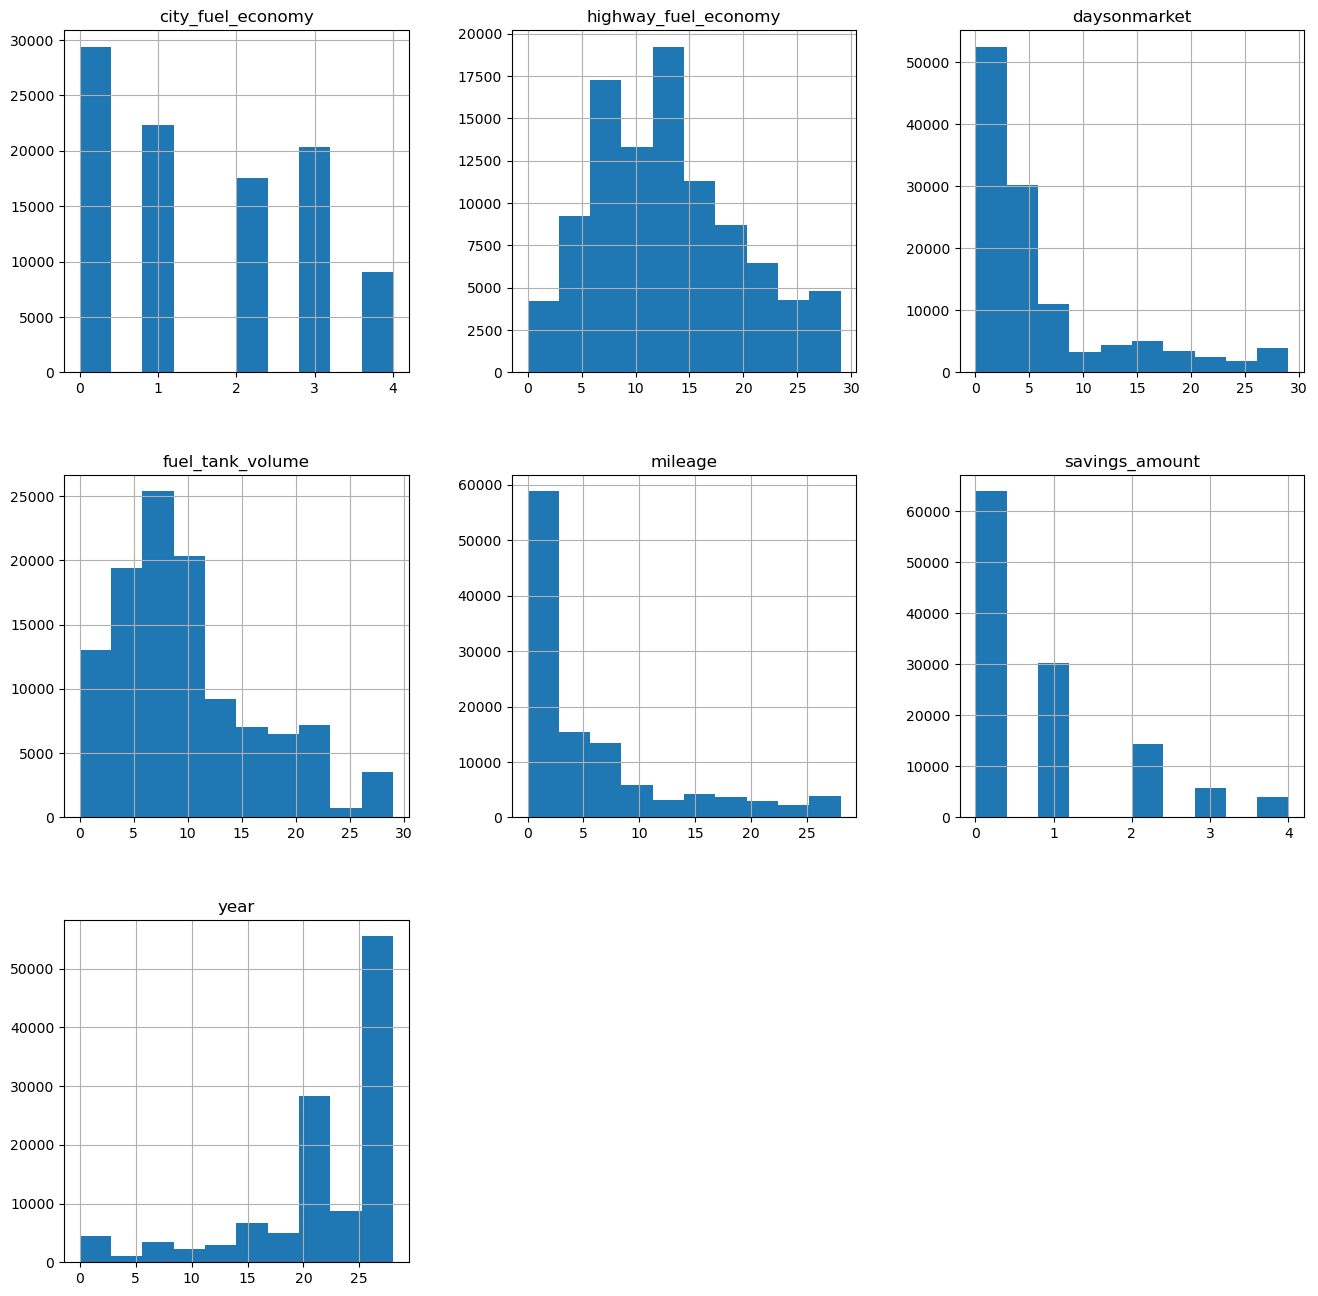

In [51]:
transformed_attr.hist(figsize=(16,16))

These look much better than before.

After all the exploratory analysis a list of attributes which are hopefully correlated to the `price` attribute have been identied. But before preperation let's take a look at the correlation between the numerical attributes and the `price` to maybe eliminate some attributes, reducing the complexity 

### Explore correlations

In [52]:
chosen_numerical_attributes : list = ['daysonmarket', 'latitude', 'longitude', 'price', 'savings_amount', 'year', 'horsepower', 'city_fuel_economy', 
'highway_fuel_economy', 'fuel_tank_volume', 'engine_displacement', 'major_options', 'mileage', 'seller_rating',
'length', 'width']

In [53]:
df_numerical = df.select_dtypes(include=[np.float64, np.int64])[['daysonmarket', 'latitude', 'longitude', 'price', 'savings_amount', 'year', 'horsepower', 'city_fuel_economy', 
'highway_fuel_economy', 'fuel_tank_volume', 'engine_displacement', 'major_options', 'mileage', 'seller_rating',
'length', 'width', 'wheelbase']]
# abs taken as don't care if posotive or negative effect
corr_series = abs(df_numerical.drop("price", axis=1).apply(lambda x: x.corr(df_numerical.price)))
corr_series.sort_values()

latitude                0.003292
savings_amount          0.025350
longitude               0.036016
seller_rating           0.058710
daysonmarket            0.097692
city_fuel_economy       0.142688
highway_fuel_economy    0.208186
major_options           0.270936
engine_displacement     0.296984
length                  0.301793
wheelbase               0.305364
fuel_tank_volume        0.331428
year                    0.350361
width                   0.362796
mileage                 0.432760
horsepower              0.511092
dtype: float64

Clearly some the attributes left don't have much of a correlation
Now let's choose all attributes with a correlation of more than 0.25 and use some of our contextual knowledge to inspect.

In [54]:
corr_series[corr_series > 0.25]

year                   0.350361
horsepower             0.511092
fuel_tank_volume       0.331428
engine_displacement    0.296984
major_options          0.270936
mileage                0.432760
length                 0.301793
width                  0.362796
wheelbase              0.305364
dtype: float64

All these attributes seem to make logical sense. One attribute that could be removed is one of `wheelbase` or `length` since they represent different ways to measure the length of a car. Since wheelbase has the higher correlation, `length` will be dropped. Let's inspect the above attributes in more detail. Any attributes we had intially chosen but have are not included above will be dropped.

In [55]:
chosen_numerical_attributes = corr_series[corr_series > 0.25].keys().tolist()
chosen_numerical_attributes.remove('length')
chosen_numerical_attributes.append('price')

In [56]:
df[chosen_numerical_attributes].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118200 entries, 82718 to 14856
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 118200 non-null  int64  
 1   horsepower           118200 non-null  float64
 2   fuel_tank_volume     112306 non-null  float64
 3   engine_displacement  111990 non-null  float64
 4   major_options        109163 non-null  float64
 5   mileage              113399 non-null  float64
 6   width                112355 non-null  float64
 7   wheelbase            112356 non-null  float64
 8   price                118200 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 9.0 MB


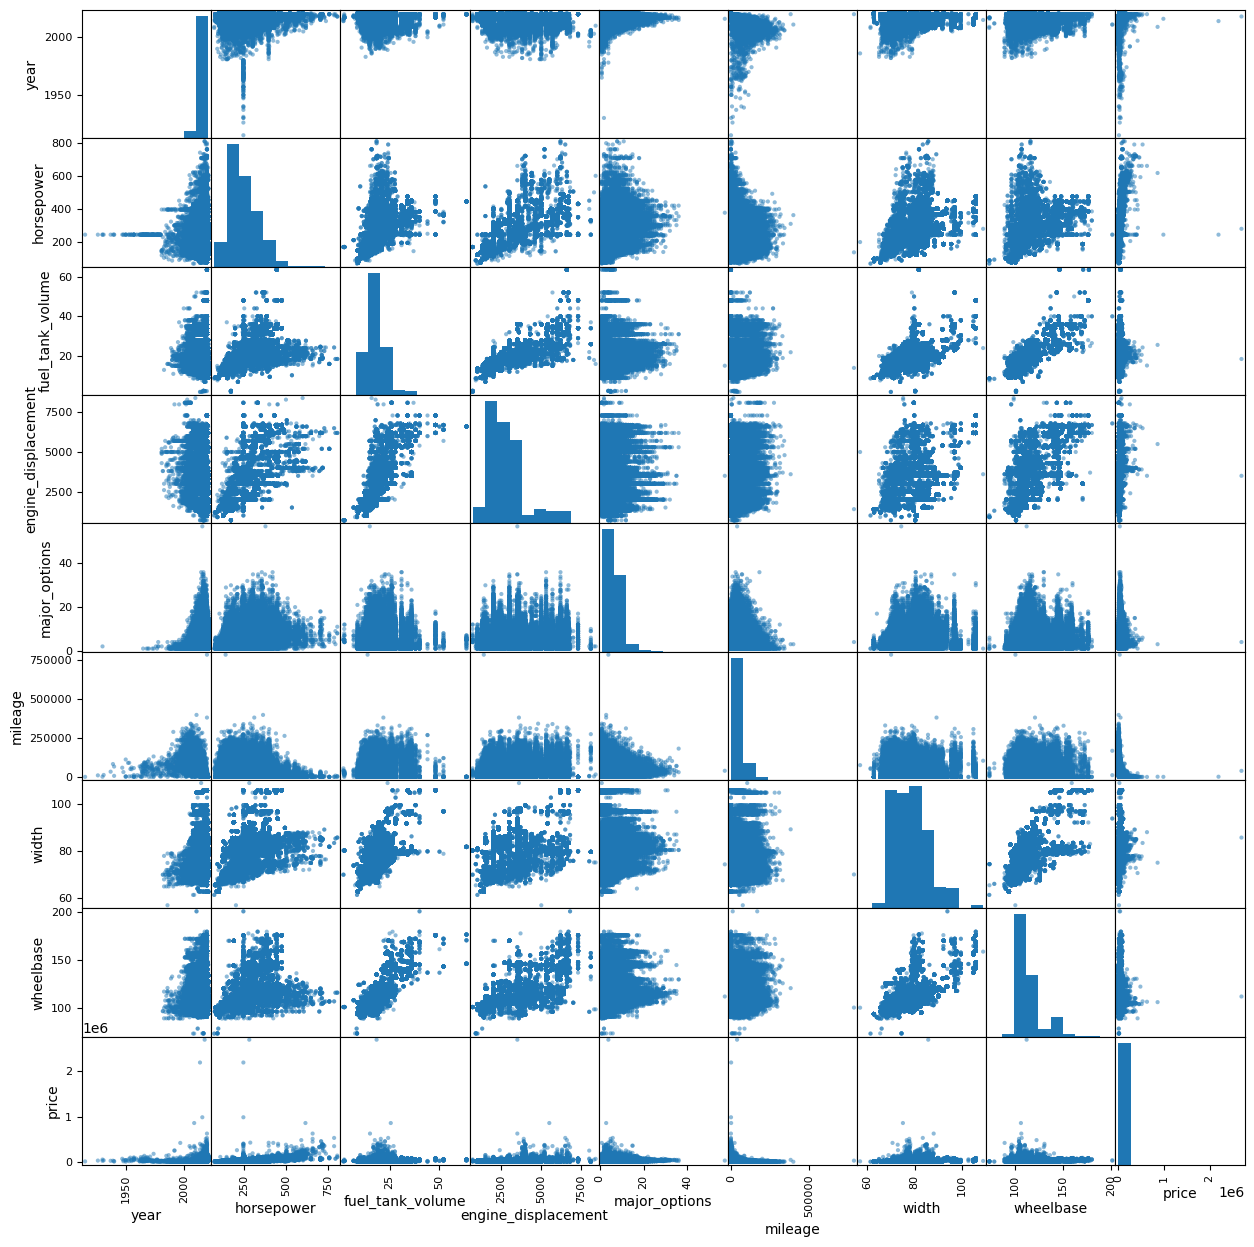

In [57]:
pd.plotting.scatter_matrix(df[chosen_numerical_attributes], figsize=(15,15))
mpl.show()

Inspecting the `price` row (or column), `horsepower` and `mileage` have the stongest correlation as to be expected. 
`wheelbase` and `width` appear to have similar correlation to price, which is to be expected by them being a measurement of size.

## 4. Prepare data

Now the intial exploration and some of the transformation needed have been identified. The data can start to be prepared.

Seperate the labels from the data:

In [58]:
prices = df["price"].copy()
prices.head(5)

82718     61465.0
63383     17463.0
292732    30259.0
286279    15990.0
92316     32987.0
Name: price, dtype: float64

In [59]:
# Drop price from dataframe
df = df.drop(columns='price')
df.head(5)

,back_legroom,body_type,city_fuel_economy,daysonmarket,engine_displacement,engine_type,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,horsepower,is_new,latitude,length,listing_color,longitude,major_options,make_name,maximum_seating,mileage,owner_count,savings_amount,seller_rating,transmission,wheel_system,wheelbase,width,year
82718,NaN,Pickup Truck,NaN,33,NaN,V8 Biodiesel,True,NaN,NaN,Biodiesel,NaN,NaN,448.661826,True,41.6311,NaN,WHITE,-72.7434,3.0,Ford,NaN,5.0,NaN,0,4.100000,A,NaN,NaN,NaN,2020
63383,35.7,SUV / Crossover,26.0,25,1400.0,I4,True,40.8,14.0,Gasoline,64.9,31.0,138.000000,True,42.5157,167.6,UNKNOWN,-83.6101,5.0,Chevrolet,5.0,3.0,NaN,0,4.095238,A,FWD,100.6,69.9,2020
292732,39.5,SUV / Crossover,26.0,15,2500.0,H4,True,42.8,18.5,Gasoline,66.1,33.0,182.000000,True,44.5090,191.3,UNKNOWN,-68.3894,NaN,Subaru,5.0,1.0,NaN,0,4.888889,CVT,AWD,108.1,82.0,2020
286279,43.5,Pickup Truck,15.0,61,3500.0,V6,False,41.4,36.0,Gasoline,76.7,21.0,365.000000,False,44.2706,231.9,BLUE,-70.2498,3.0,Ford,6.0,138584.0,2.0,2456,4.000000,A,4WD,144.5,97.0,2013
92316,NaN,SUV / Crossover,NaN,18,NaN,V6,True,NaN,NaN,Gasoline,NaN,NaN,300.829801,False,42.1821,NaN,UNKNOWN,-72.6381,4.0,Lexus,NaN,53551.0,1.0,799,4.444444,A,NaN,NaN,NaN,2017


In [60]:
chosen_attributes : list = chosen_numerical_attributes + chosen_categorical_attributes + chosen_boolean_attributes
chosen_attributes.remove('price')
df = df[chosen_attributes].copy()

Check out any remaining data values which are missing:

In [61]:
df.count() / sample_size

year                   1.000000
horsepower             1.000000
fuel_tank_volume       0.950135
engine_displacement    0.947462
major_options          0.923545
mileage                0.959382
width                  0.950550
wheelbase              0.950558
body_type              0.995956
engine_type            0.969873
fuel_type              0.975575
listing_color          1.000000
make_name              1.000000
transmission           0.986074
wheel_system           0.955008
franchise_dealer       1.000000
is_new                 1.000000
dtype: float64

### Imputation
Let's fix the null values.

Similar to what happened for `horsepower `, `wheelbase` and `width` can assumed to be similar measures of a cars size and hence the `body_type` can be used as a proxy. This is chosen for the high number of non-null values. For any which don't have the `body_type` attribute the overall average will be used.

In [62]:
### TIDY UP ###
df[['wheelbase']] = df[['wheelbase', 'body_type']].groupby('body_type').transform(lambda x: x.fillna(x.mean()))
df[['width']] = df[['width', 'body_type']].groupby('body_type').transform(lambda x: x.fillna(x.mean()))

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['wheelbase']])
df[['wheelbase']] = imputer.transform(df[['wheelbase']])

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['width']])
df[['width']] = imputer.transform(df[['width']])

In [63]:
# Check everything worked
df[['wheelbase', 'width']].count() / sample_size

wheelbase    1.0
width        1.0
dtype: float64

For `mileage`, `year` will be used as a proxy. The median will be used now since the variables are discrete and transformed.

In [64]:
df[['mileage']] = df[['mileage', 'year']].groupby('year').transform(lambda x: x.fillna(x.median()))

In [65]:
# Check everything worked
df.mileage.count() / sample_size

1.0

For `major_options` the median will be taken, since the number of different possible options is low and a central discrete metric is desried.

In [66]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df[['major_options']])
df[['major_options']] = imputer.transform(df[['major_options']])

For `body_type` since there is very few entries missing, the mode for the attribute would make sense for this catagorical attribute.

In [67]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df[['body_type']])

df[['body_type']] = imputer.transform(df[['body_type']])

Similarly for `transmission` as few entries missing, the mode will be used.

In [68]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df[['transmission']])

df[['transmission']] = imputer.transform(df[['transmission']])

For `wheel_system` the `body_type` will be used as a proxy, and the mode for the given body type will be taken as the value.

In [69]:
df[['wheel_system']] = df[['wheel_system', 'body_type']].groupby('body_type').transform(lambda x: x.fillna(x.mode()[0]))

For `fuel_tank_volume` this is likely proportional to the type of car, so the median of the `fuel_tank_volume` for the `body_type` can be used as proxy. Think about hatchbacks vs trucks.

In [70]:
df[['fuel_tank_volume']] = df[['fuel_tank_volume', 'body_type']].groupby('body_type').transform(lambda x: x.fillna(x.median()))

For `fuel_type` let's examine the attribute in more detial

In [71]:
df.fuel_type.value_counts()

Gasoline                  105273
Flex Fuel Vehicle           5183
Hybrid                      2432
Diesel                      1198
Biodiesel                    631
Electric                     593
Compressed Natural Gas         3
Name: fuel_type, dtype: int64

Clearly an overwhelming majority is Gasoline, so let's fill all NaNs with Gasoline.

In [72]:
df['fuel_type'] = df['fuel_type'].fillna('Gasoline')

Now let's deal with `engine_type`. Let's take a closer look at the options available a bit closer:

In [73]:
df.engine_type.value_counts()

I4                           57432
V6                           29274
V8                            9253
H4                            5157
V8 Flex Fuel Vehicle          2507
V6 Flex Fuel Vehicle          2377
I4 Hybrid                     2286
I3                            2034
I6                            1503
V8 Biodiesel                   540
V6 Diesel                      340
I6 Diesel                      332
I4 Flex Fuel Vehicle           294
I4 Diesel                      291
I5                             242
H6                             209
V8 Diesel                      164
V6 Hybrid                      134
V6 Biodiesel                    91
V12                             66
V10                             43
I2                              23
W12                             20
H4 Hybrid                        7
R2                               6
W12 Flex Fuel Vehicle            5
V8 Hybrid                        4
V8 Compressed Natural Gas        3
W8                  

Inital thoughts are there a lot of different categories so this may be a difficult attribute to fix. Let's explore the the relation between `make_name`, `body_type` and `engine_type`.

In [74]:
groups = df.groupby(['make_name', 'body_type'])
pd.set_option("display.max_rows", None)
groups.engine_type.value_counts()

make_name      body_type        engine_type              
Acura          Coupe            V6                              6
                                V6 Hybrid                       2
               SUV / Crossover  V6                            780
                                I4                            170
                                V6 Hybrid                       8
               Sedan            I4                            298
                                V6                            192
                                V6 Hybrid                       7
                                I4 Hybrid                       2
               Wagon            I4                              1
Alfa Romeo     Coupe            I4                              2
               SUV / Crossover  I4                            196
                                V6                              3
               Sedan            I4                            197
                  

In [75]:
# Add max rows back
pd.set_option("display.max_rows", 10)

From the above with visual inspection if the mode for a given `make_name` and `body_type` is taken as the `engine_type` this should give a good imputation

In [76]:
df[['engine_type', 'body_type', 'make_name']].groupby(['body_type', 'make_name']).fillna(lambda x: x.agg(pd.Series.most)).count() / sample_size

engine_type    1.0
dtype: float64

In [77]:
assert False

AssertionError: 

In [107]:
df[['engine_type', 'body_type']].groupby('body_type', group_keys=False)['engine_type'].apply(lambda x: x.agg(pd.Series.mean))

TypeError: can only concatenate str (not "int") to str

In [95]:
df[['engine_type', 'body_type']].groupby('body_type', group_keys=False).engine_type.apply(lambda x: x.fillna(x.mode())).head(10)

82718     V8 Biodiesel
63383               I4
292732              H4
286279              V6
92316               V6
133922              I4
259451              H4
59546               V8
149880             NaN
104045              V6
Name: engine_type, dtype: object

For `engine_displacement` the attribute is given the median for an entry with a given `engine_type`

In [ ]:
df['engine_displacement'] = df[['engine_displacement', 'engine_type']].groupby('engine_type').fillna(lambda x: x.agg(pd.Series.median))

In [ ]:
df.engine_type.head(10)

Let's check all the data is looking good.

In [ ]:
df.info()

Fantastic, all is good!

Now all NaNs have been dealt with let's see if the transformations discussed earlier still need applying. The only attributes from before that we transformed left are:
- `fuel_tank_volume` 
- `mileage`
- `savings_amount` 
- `year`

In [ ]:
df.hist(figsize=(16,16))

`year` and `mileage` appear to be the only ones that still need transforming. Let's do it same as before:

In [ ]:
transform_attributes: list = ["mileage", "year"]
df[transform_attributes] = df[transform_attributes].apply(lambda x: transform_bins(x, bins=30))
df[transform_attributes].hist()

These look much better than before.
### Transformation pipelines
Now we have the data preproccessed in the desired form, let's turn this into a pipeline.

Firstly, let's get the names of all the attributes we need from the dataset. And print the head of the orignial `train_set` so the index of each attribute can be seen. This is need as for the pipeline the data is passed as numpy arrays, so all index and attributes need to match correctly.

In [ ]:
attributes : list = df.keys().to_list()
print(attributes)
train_set[attributes].head(5)

That all looks good.

Next let's make the pipeline:

In [ ]:
def clean_data(raw_df: pd.DataFrame) -> pd.DataFrame:
    """
    A function to clean up a raw dataset passed applying all column drops,
    transformations and fillling of NaNs
    """
    df = raw_df
    df : pd.DataFrame = df.loc[:, ['year', 'horsepower', 'fuel_tank_volume', 'engine_displacement', 'major_options', 
              'mileage', 'width', 'wheelbase', 'body_type', 'engine_type', 'fuel_type', 
              'listing_color', 'make_name', 'transmission', 'wheel_system', 'franchise_dealer', 
              'is_new']]
    
    attr_to_convert : list = ["fuel_tank_volume", "wheelbase", "width"]
    
    df.loc[:, attr_to_convert] = df.loc[:, attr_to_convert].applymap(convert_measurement).astype(np.float64)
    
    categorical_data: list = df.select_dtypes(include=object).keys().tolist()
    float_data: list = df.select_dtypes(include=np.float64).keys().tolist()
    int_data: list = df.select_dtypes(include=np.int64).keys().tolist()
    
    numerical_data: list = float_data + int_data
    """
    # When grouped by same can do at once
    df.loc[:, 'horsepower'] = df.loc[:, ['horsepower', 'engine_type']].groupby('engine_type').transform(lambda x: x.fillna(x.mean)
    df.loc[:, 'major_options'] = df['major_options'].apply(lambda x: len(x.split(",")) if type(x) == str else "NaN").astype(np.float64)
    df.loc[:, 'wheelbase'] = df[['wheelbase', 'body_type']].groupby('body_type').transform(lambda x: x.fillna(x.mean)
    df.loc[:, 'width'] = df[['width', 'body_type']].groupby('body_type').transform(lambda x: x.fillna(x.mean)
    df.loc[:, 'mileage'] = df[['mileage', 'year']].groupby('year').transform(lambda x: x.fillna(x.median)
    df.loc[:, 'wheel_system'] = df[['wheel_system', 'body_type']].groupby('body_type').transform(lambda x: x.fillna(x.mode()[0]))
    df.loc[:, 'fuel_tank_volume'] = df[['fuel_tank_volume', 'body_type']].groupby('body_type').transform(lambda x: x.fillna(x.median)
    df.loc[:, 'fuel_type'] = df['fuel_type'].fillna('Gasoline')
    df.loc[:, 'engine_displacement'] = df[['engine_displacement', 'engine_type']].groupby('engine_type').fillna(lambda x: x.agg(pd.Series.median))
    df.loc[:, 'engine_type'] = df[['engine_type', 'body_type', 'make_name']].groupby(['body_type', 'make_name']).fillna(lambda x: x.agg(pd.Series.mode))
    transform_attributes: list = ["mileage", "year"]
    df[transform_attributes] = df[transform_attributes].apply(lambda x: transform_bins(x, bins=30))
    """
    # Imputation by using mode of different relevant groups
    
    df.loc[:, 'fuel_tank_volume'] = df.loc[:, ['fuel_tank_volume', 'body_type']].groupby('body_type').fillna(lambda x: x.agg(pd.Series.median))
    df.loc[:, 'wheel_system'] = df.loc[:, ['wheel_system', 'body_type']].groupby('body_type').fillna(lambda x: x.agg(pd.Series.mode))  
    df.loc[:, 'mileage'] = df.loc[:, ['mileage', 'year']].groupby('year').fillna(lambda x: x.agg(pd.Series.median))    
    df.loc[:, ['wheelbase', 'width']] =  df.loc[:, ['wheelbase', 'width', 'body_type']].groupby('body_type').fillna(lambda x: x.agg(pd.Series.mean))
    df.loc[:, 'major_options'] = df.loc[:, 'major_options'].apply(lambda x: len(x.split(",")) if type(x) == str else "NaN")
    df.loc[:, 'fuel_type'] = df.loc[:, 'fuel_type'].fillna('Gasoline')
    df.loc[:, ['horsepower', 'engine_displacement']] =  df.loc[:, ['horsepower', 'engine_displacement', 'engine_type']].groupby('engine_type').fillna(lambda x: x.agg(pd.Series.mean))
    df.loc[:, 'engine_type'] = df.loc[:, ['engine_type', 'body_type', 'make_name']].groupby(['body_type', 'make_name']).fillna(lambda x: x.agg(pd.Series.mode))
     
    
    df = df.copy()
    print(df.info())
    # Fill any remaing NaNs
    meanImputer =  SimpleImputer(missing_values=np.nan, strategy='mean')
    medianImputer = SimpleImputer(missing_values=np.nan, strategy='median')
    modeImputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    
    print(df[float_data].head())
    
    df.loc[:, categorical_data]= modeImputer.fit_transform(df.loc[:, categorical_data])
    df.loc[:, numerical_data] = medianImputer.fit_transform(df.loc[:, numerical_data])
    
    # Transformation of attributes so that the training and tests set have similar distributions
    transform_attributes: list = ["mileage", "year"]
    df[transform_attributes] = df[transform_attributes].apply(lambda x: transform_bins(x, bins=30))
    return df

In [ ]:
df.head()

In [ ]:
new : pd.DataFrame = clean_data(train_set)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

    

### Encoding the data
Now the data set is ready to be encoded correctly for the models.

In [ ]:
df.info()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
ordinal_encoder = OrdinalEncoder()
one_hot_encoder = OneHotEncoder()



In [ ]:
assert False

### Test distributions
Let's compare the training set and test set distributions to check. All NAs will be dropped for this since the function will not work otherwise. Note this is valid since we can assume that both sets should have a similar amount of NAs.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
shuffled_data = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=314)

attr_dist_change: list = ['city_fuel_economy', 'highway_fuel_economy', 'year']

results: dict = {}
    
for attr in attr_dist_change:
    # Sample for all these new distributions created to see any problems
    [(train_index, test_index)] = shuffled_data.split(df, df[attr])
    stratified_train_set = df.loc[train_index]
    stratified_test_set = df.loc[test_index]

    train_make_up = stratified_train_set[attr].value_counts() / len(stratified_train_set)
    test_make_up = stratified_test_set[attr].value_counts() / len(stratified_test_set)
    results[attr] = train_make_up - test_make_up

In [ ]:
###########################################################

In [ ]:
# os.chdir(folder_path)
# file_names : list = [i for i in glob.glob("*.{}".format('csv'))]
# df = pd.concat(map(read_car_data, file_names))


## Choosing attributes

Inspecting this list and using our contextual knowledge of cars, as well as the info available on the [kaggle page](https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset). Certain attributes can be removed immediately, leaving ones that are believed to influence the price. Any attributes left will be further inspected before any models are used. 

Note: data types are now defined to make sure any further exploration is done correctly.

In [ ]:
# Attributes belived to influence price
desired_attributes : list = ["body_type", "city", "daysonmarket", "dealer_zip", "engine_cylinders", "engine_displacement",
                             "engine_type", "fleet", "frame_damaged", "franchise_dealer", "fuel_tank_volume", "has_accidents", "horsepower",
                            "is_new", "listed_date", "make_name", "owner_count", "power", "price",
                             "savings_amount", "seller_rating", "year", "torque"
                            ]
    
# REMOEVE ANY IRRELEVANT ONES
# Define datatypes of attributes to make sure any exploration is good.
data_types = {'vin' : str, 'back_legroom' : str, 'bed' : str, 'bed_height' : str,
              'bed_length' : str, 'body_type' : str, 'cabin' : str, 'city' : str,
              'city_fuel_economy' : np.float64, 'combine_fuel_economy' : np.float64,
              'daysonmarket' : np.int32, 'dealer_zip' : np.int32, 'description' : str, 
              'engine_cylinders' : str, 'engine_displacement' : np.float64,
              'engine_type' : str, 'exterior_color' : str, 'fleet' : bool, 'frame_damaged' : bool,
              'franchise_dealer' : bool, 'franchise_make' : str, 'front_legroom' : str,
              'fuel_tank_volume' : str, 'fuel_type' : str, 'has_accidents' : bool, 'height' : str,
            'highway_fuel_economy' : np.float64, 'horsepower' : np.float64, 'interior_color' : str, 'isCab' : bool,
            'is_certified' : bool, 'is_cpo' : bool, 'is_new' : bool, 'is_oemcpo' : bool, 'latitude' : np.float64, 'length' : str,
            'listed_date' : str, 'listing_color' : str, 'listing_id' : np.int32, 'longitude' : np.float64,
            'main_picture_url' : str, 'major_options' : str, 'make_name' : str, 'maximum_seating' : np.int32,
            'mileage' : np.int32, 'model_name' : str, 'owner_count' : np.int32, 'power' : str, 'price' : np.float64, 'salvage' : bool,
            'savings_amount' : np.int32 , 'seller_rating' : np.float64, 'sp_id' : np.int32, 'sp_name' : str, 'theft_title' : bool,
            'torque' : str, 'transmission' : str, 'transmission_display' : str, 'trimId' : np.int32, 'trim_name' : str,
            'vehicle_damage_category' : str, 'wheel_system' : str, 'wheel_system_display' : str,
            'wheelbase' : str, 'width' : str, 'year' : np.int32}

    
df = df[df.columns.intersection(desired_attributes)].convert_dtypes(data_types).copy()
